## Content

1. Loading and Visualizing data

2. Constructing the model

3. Implementation/Training the model

4. Plot the result

5. References

In [36]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Loading and Visualizing data

In [37]:
# The data is from Coursera Machine Learning course/week2/ex1data1.txt
data = np.loadtxt('../data/data1.txt', delimiter = ',')

X = data[:, 0, np.newaxis]  # Population
Y = data[:, 1, np.newaxis]  # Profit

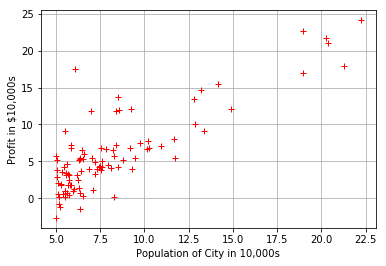

In [38]:
# Visualize data
figureId = 1

def plotData(X, Y):
    global figureId
    plt.figure(figureId)
    plt.figure()
    plt.grid()
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.plot(X, Y, 'r+')
    plt.draw()
    
    figureId += 1

plotData(X, Y)
plt.show()

## 2. Constructing the model

We use Linear Regression model (hypothesis function is a linear function):
$$h_{\theta}(x) = \theta_{0} + \sum_{i = 1}^{n}\theta_{i} x_{i}$$
_with n is the number of features of x_

Set $x_{0} = 1$, we have:
$$h_{\theta}(X) = \sum_{i = 0}^{n} \theta_{i} x_{i} = \theta^{T}x$$
_This is called bias term_

Loss function of i-_th_ training data (square loss is often used in Linear Regression [1]):
$$L(\hat{y}^{(i)}, y^{(i)}) = (h_{\theta}(x^{(i)}) - y^{(i)})^{2} = (\theta^{T}x - y^{(i)})^2$$

Cost function on the whole training data set

$$ J(\theta) = \frac{1}{2m}\sum_{i = 1}^{m}L(\hat{y}^{(i)}, y) = \frac{1}{2m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

Our goal is to minimize this cost funtion $J(\theta)$, to do that we can use Gradient Descent.

We need to compute the derivative $\frac{dJ}{d\theta_{j}}$:

$$\frac{dJ}{d\theta_{j}} = \frac{1}{m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}_{j}$$

Our update formular:

$$\theta_{j} = \theta_{j} - \alpha \frac{dJ}{d\theta_{j}} = \theta_{j} - \alpha \frac{1}{m}\sum_{i = 1}^{m}(h_{\theta}(x^{(i)} - y^{(i)})x^{(i)}_{j}$$

_with $\alpha$ is the learning rate._

## 3. Implementation/Training the model

In order to run Gradient Descent (or other type of optimization algorithms) efficiently, we need to firstly normalize our data, this is called Feature Scaling (or Feature Normalization).

There are some methods to normalize data, we will use Standardization:

In [39]:
# Feature Normalization using Standardization
# x = (x - μ) / σ
mu = np.mean(X, axis = 0)
sd = np.std(X, axis = 0)
X = (X - mu) / sd

Adding bias term and define some paramters for Gradient Descent

In [40]:
X = np.column_stack((np.ones((X.shape[0], 1)), X))  # No need to nomarlize bias term

alpha = 0.0025  # learning rate
w_init = np.zeros((X.shape[1], 1))  # theta

Traning the model

In [52]:
def gradient_descent(X, Y, w_init, alpha, max_iter = 1000):
    w = w_init
    m = X.shape[0]  # Number of training examples
    iter = 0
    while iter < max_iter:
        # Batch gradient descent 
        loss = X.dot(w) - Y
        w = w - alpha * (1 / m) * X.T.dot(loss)
        iter += 1
        
    return w
    
w = gradient_descent(X, Y, w_init, alpha)

In [53]:
w = w.ravel()
print(w)

[ 5.36132764  4.21719967]


## 4. Plot the result

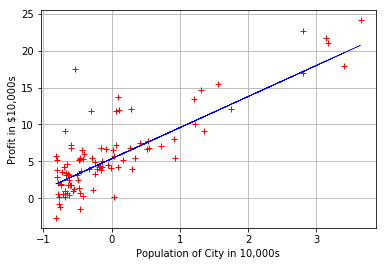

In [54]:
# Training data
plotData(X[:, 1], Y)

plt.plot(X[:, 1], w[0] + w[1] * X[:, 1],
         color = 'blue', 
         linewidth = '0.5')
plt.draw()
plt.show()

## 5.  References

[[1] Objective function, cost function, loss function: are they the same thing?](https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing)